<div style="font-size:37px; font-weight:bold; line-height:1.1">
    Importing data from the Orbital Data Explorer
</div>

<p style="color:rgb(90,90,90);">
The MIT License (MIT)
<br>
Copyright (c) 2018 Massachusetts Institute of Technology
</p>
<p style="color:rgb(90,90,90);">
Author: Guillaume Rongier
<br>
This software has been created in projects supported by the US National Science Foundation and NASA (PI: Pankratius).
</p>
<p style="color:rgb(90,90,90);">
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
</p>
<ul style="color:rgb(90,90,90);">
<li>The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.</li>
<li>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.</li>
</ul>

This notebook illustrates the use of SCIKIT-data access to cache and use data from the Orbital Data Explorer (ODE) of NASA's [Planetary Data System's (PDS)](https://pds.jpl.nasa.gov/) [Geosciences Node](http://pds-geosciences.wustl.edu/default.htm).

ODE contains numerous and diverse data, and the purpose of this notebook is not to detail how to access every single one of them, but to illustrate some examples. While SCIKIT-data access should be able to download any of them, we cannot garantee that every data set is accessible through this Python interface. Please feel free to contribute and improve the accessibility of ODE's data through SCIKIT-data access.

# Package imports

In [1]:
%matplotlib notebook

from skdaccess.planetary.ode.cache import DataFetcher as ODEDF

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function definitions

In [2]:
def unit_scale_array(array):
    return (array - np.nanmin(array))/(np.nanmax(array) - np.nanmin(array))

# Technical foreword

SCIKIT-data access relies on ODE's [Representational State Transfer (REST) interface](http://oderest.rsl.wustl.edu/) to query PDS products, and on the [Geospatial Data Abstraction Library (GDAL)](http://www.gdal.org/) to open and access the data in [NumPy](http://www.numpy.org/) arrays. We can then use [matplotlib](https://matplotlib.org/) to visualize the data.

It is decomposed into two elements: a data fetcher, which retrieve the data's URLs and cache the data, and a data wrapper, which provide access to the data in Python through a common interface for all the data. The data fetcher's parameters inform about the query to ODE. Only four parameters are compulsory:
* target: Aimed planetary body, i.e., Mars, Mercury, Moon, Phobos, or Venus.
* mission: Aimed mission, e.g., MGS or MRO.
* instrument: Aimed instrument from the mission, e.g., HIRISE or CRISM.
* product_type: Type of product to look for, e.g., DTM or RDRV11.

You can find more information about the different missions, intruments, and product types supported by ODE on its websites and its [user's manual](http://ode.rsl.wustl.edu/mars/pagehelp/quickstartguide/index.html). The data fetcher lets you define eleven other parameters to refine your query:
* western_lon: Western longitude to look for the data, from 0 to 360 (default: none).
* eastern_lon: Eastern longitude to look for the data, from 0 to 360 (default: none).
* min_lat: Minimal latitude to look for the data, from -90 to 90 (default: none).
* max_lat: Maximal latitude to look for the data, from -90 to 90 (default: none).
* min_ob_time: Minimal observation time in (even partial) UTC format, e.g., '2017-03-01' (default: none).
* max_ob_time: Maximal observation time in (even partial) UTC format, e.g., '2017-03-01' (default: none).
* product_id: PDS Product ID to look for, with wildcards (*) allowed (default: none).
* file_name: File name to look for, with wildcards (*) allowed (default: none).
* number_product_limit: Maximal number of products to return (ODE allows 100 at most) (default: 10).
* result_offset_number: Offset the return products, to go beyond the limit of 100 returned products (default: 0).
* remove_ndv: Replace the no-data value as mentionned in the data label by np.nan (default: true).

# Examples of data available for Mars

Mars data are accessible through the [Mars Orbital Data Explorer](http://ode.rsl.wustl.edu/mars/indexProductSearch.aspx), whose interface can be useful to explore the possible values to use in the data fetcher.

## Mars Global Surveyor

### MOLA - Mars Orbital Laser Altimeter

*ODEDF* defines the data fetcher, and *output()* returns the data wrapper to access the data in Python. Here, we use the product ID to avoid the download of all the elevation data from MOLA.

Calling *output()* actually caches and opens the data. It shows the query URL, which stores the result of the query in XML. You can use it to get more information about the products, but also to assess some errors that would not be shown by the current interface. Then, it shows a list of files to be downloaded, and asks if you want to proceed to the download. If you are not satisfyed with the query results, you just have to anwser "no", to change the parameters' values of the data fetcher, and to re-run the cell.

In [3]:
target = 'mars'
mission = 'MGS'
instrument = 'MOLA'
product_type = 'MEGDR'
product_id = '*T*FB*'

mola_data_fetcher = ODEDF(target, mission, instrument, product_type,
                          product_id = product_id)
mola_data = mola_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MGS&iid=MOLA&pt=MEGDR&query=product&results=fp&output=XML&limit=10&offset=0&productid=*T*FB*

Files that will be downloaded (if not previously downloaded):

Product ID: MEGT90N000FB.IMG
File name: megt90n000fb.hdr
Description: PRODUCT ENVI HEADER FILE
File name: megt90n000fb.img
Description: PRODUCT DATA FILE
File name: megt90n000fb.lbl
Description: PRODUCT LABEL FILE

Do you want to proceed? [Y/n] y


100%|██████████| 3/3 [00:49<00:00, 10.48s/it]


The resulting data wrapper gives you access to the data and some meta-data, for instance the projection or the extent of the raster.

In [4]:
print(mola_data.data.keys())

odict_keys(['MEGT90N000FB.IMG'])


In [5]:
product = list(mola_data.data.keys())[0]
print(mola_data.data[product].keys())

odict_keys(['megt90n000fb.lbl'])


<IPython.core.display.Javascript object>


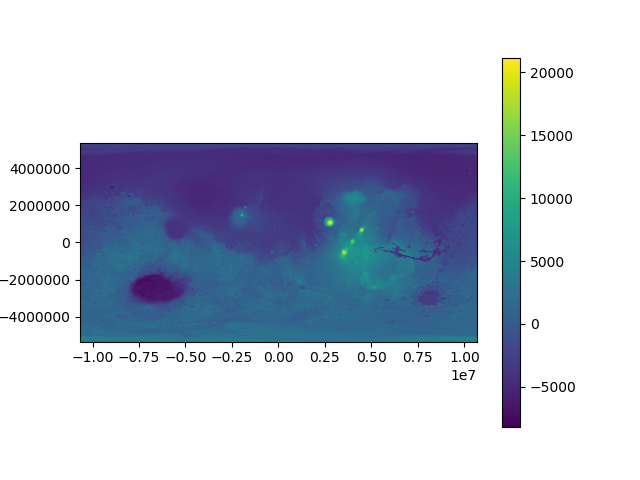

In [6]:
file = list(mola_data.data[product].keys())[0]
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(mola_data.data[product][file],
                        extent = mola_data.meta_data[product][file]['Extent'],
                        cmap = 'viridis',
                        interpolation = 'None')
raster_map_colorbar = plt.colorbar(raster_map)
plt.show()

### MOC-NA/WA - Mars Orbiter Camera

You can also access unprojected rasters, for instance pictures, using the same process.

In [7]:
target = 'mars'
mission = 'MGS'
instrument = 'MOC-NA/WA'
product_type = 'NADSDP'
western_lon = 253.5
eastern_lon = 253.75
min_lat = -24.
max_lat = -23.9
remove_ndv = False

moc_data_fetcher = ODEDF(target, mission, instrument, product_type,
                         western_lon, eastern_lon, min_lat, max_lat,
                         remove_ndv = remove_ndv)
moc_data = moc_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MGS&iid=MOC-NA/WA&pt=NADSDP&westernlon=253.5&easternlon=253.75&minlat=-24.0&maxlat=-23.9&query=product&results=fp&output=XML&limit=10&offset=0

Files that will be downloaded (if not previously downloaded):

Product ID: AB-1-005/08
File name: ab100508.img
Description: PRODUCT DATA FILE WITH LABEL

Do you want to proceed? [Y/n] y


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


In [8]:
print(moc_data.data.keys())

odict_keys(['AB-1-005/08'])


In [9]:
product = list(moc_data.data.keys())[0]
print(moc_data.data[product].keys())

odict_keys(['ab100508.img'])


<IPython.core.display.Javascript object>


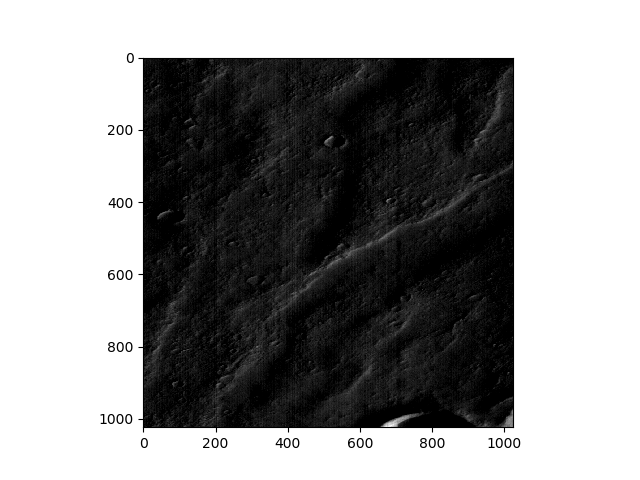

In [10]:
file = list(moc_data.data[product].keys())[0]
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(moc_data.data[product][file],
                        cmap = 'gray',
                        interpolation = 'None')
plt.show()

## ESA's Mars Express

### HRSC - High Resolution Stereo Camera

Some of the pictures let you access several channels, and can be used to create composite RGB images.

In [11]:
target = 'mars'
mission = 'MEX'
instrument = 'HRSC'
product_type = 'REFDR3'
western_lon = 85
eastern_lon = 87
min_lat = -2.
max_lat = 5.
product_id = 'H2162*'

hrsc_data_fetcher = ODEDF(target, mission, instrument, product_type,
                          western_lon, eastern_lon, min_lat, max_lat,
                          product_id = product_id)
hrsc_data = hrsc_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MEX&iid=HRSC&pt=REFDR3&westernlon=85&easternlon=87&minlat=-2.0&maxlat=5.0&query=product&results=fp&output=XML&limit=10&offset=0&productid=H2162*

Files that will be downloaded (if not previously downloaded):

Product ID: H2162_0002_BL3.JP2
File name: h2162_0002_bl3.jp2
Description: PRODUCT DATA FILE
File name: h2162_0002_bl3.lbl
Description: PRODUCT LABEL FILE

Product ID: H2162_0002_GR3.JP2
File name: h2162_0002_gr3.jp2
Description: PRODUCT DATA FILE
File name: h2162_0002_gr3.lbl
Description: PRODUCT LABEL FILE

Product ID: H2162_0002_IR3.JP2
File name: h2162_0002_ir3.jp2
Description: PRODUCT DATA FILE
File name: h2162_0002_ir3.lbl
Description: PRODUCT LABEL FILE

Product ID: H2162_0002_ND3.JP2
File name: h2162_0002_nd3.jp2
Description: PRODUCT DATA FILE
File name: h2162_0002_nd3.lbl
Description: PRODUCT LABEL FILE

Product ID: H2162_0002_P13.JP2
File name: h2162_0002_p13.jp2
Description: PRODUCT DATA FILE
File name: h216

100%|██████████| 18/18 [01:06<00:00,  3.18s/it]


In this case, the no-data value in the label files is not correct, and we need to correct it manually.

In [12]:
for product in hrsc_data.data:
    for file in hrsc_data.data[product]:
        hrsc_data.data[product][file][hrsc_data.data[product][file] == 0] = np.nan

In [13]:
print(hrsc_data.data.keys())

odict_keys(['H2162_0002_BL3.JP2', 'H2162_0002_GR3.JP2', 'H2162_0002_IR3.JP2', 'H2162_0002_ND3.JP2', 'H2162_0002_P13.JP2', 'H2162_0002_P23.JP2', 'H2162_0002_RE3.JP2', 'H2162_0002_S13.JP2', 'H2162_0002_S23.JP2'])


Here, each downloaded product has its own label, and we will use three of the products, corresponding to the sensors red, green, and blue of the High Resolution Stereo Camera, to build a composite image.

In [14]:
product_red = list(hrsc_data.data.keys())[6]
print(hrsc_data.data[product_red].keys())
product_green = list(hrsc_data.data.keys())[1]
print(hrsc_data.data[product_green].keys())
product_blue = list(hrsc_data.data.keys())[0]
print(hrsc_data.data[product_blue].keys())

odict_keys(['h2162_0002_re3.lbl'])
odict_keys(['h2162_0002_gr3.lbl'])
odict_keys(['h2162_0002_bl3.lbl'])


In [15]:
r_array = unit_scale_array(hrsc_data.data[product_red][list(hrsc_data.data[product_red].keys())[0]])
g_array = unit_scale_array(hrsc_data.data[product_green][list(hrsc_data.data[product_green].keys())[0]])
b_array = unit_scale_array(hrsc_data.data[product_blue][list(hrsc_data.data[product_blue].keys())[0]])
alpha_array = np.ones(hrsc_data.data[product_red][list(hrsc_data.data[product_red].keys())[0]].shape)
alpha_array[np.isnan(hrsc_data.data[product_red][list(hrsc_data.data[product_red].keys())[0]])] = 0
composite_array = np.dstack((r_array, g_array, b_array, alpha_array))

<IPython.core.display.Javascript object>


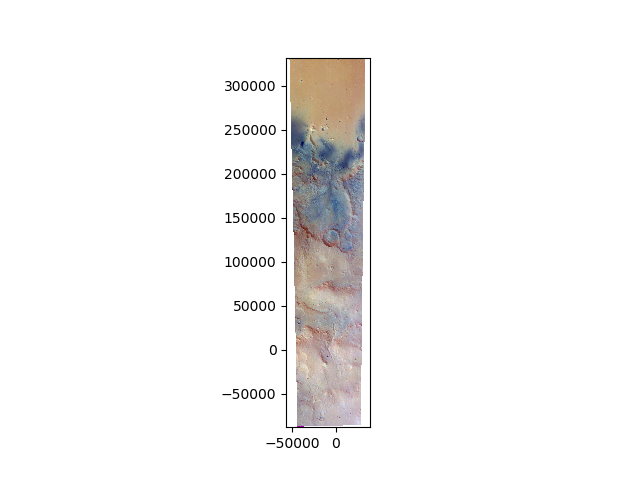

In [16]:
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(composite_array,
                        extent = hrsc_data.meta_data[product_red][list(hrsc_data.data[product_red].keys())[0]]['Extent'],
                        interpolation = 'None')
plt.show()

In this example, a Digital Terrain Model built from HRSC stereo-images exists for same the area, and we can access it too. *DA* means that we look for a product with the elevation from Mars aeroid. ODE's [user's manual](http://ode.rsl.wustl.edu/mars/pagehelp/quickstartguide/index.html) is particularly useful to understand the product IDs and how to use them to refine the query.

In [17]:
target = 'mars'
mission = 'MEX'
instrument = 'HRSC'
product_type = 'DTMRDR'
western_lon = 85.804
eastern_lon = 85.805
min_lat = 1.461
max_lat = 1.462
product_id = '*DA*'

hrsc_dtm_data_fetcher = ODEDF(target, mission, instrument, product_type,
                              western_lon, eastern_lon, min_lat, max_lat,
                              product_id = product_id)
hrsc_dtm_data = hrsc_dtm_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MEX&iid=HRSC&pt=DTMRDR&westernlon=85.804&easternlon=85.805&minlat=1.461&maxlat=1.462&query=product&results=fp&output=XML&limit=10&offset=0&productid=*DA*

Files that will be downloaded (if not previously downloaded):

Product ID: H2162_0002_DA4.IMG
File name: h2162_0002_da4.img
Description: PRODUCT DATA FILE WITH LABEL

Do you want to proceed? [Y/n] y


100%|██████████| 1/1 [00:10<00:00, 10.80s/it]


In [18]:
print(hrsc_dtm_data.data.keys())

odict_keys(['H2162_0002_DA4.IMG'])


In [19]:
product = list(hrsc_dtm_data.data.keys())[0]
print(hrsc_dtm_data.data[product].keys())

odict_keys(['h2162_0002_da4.img'])


<IPython.core.display.Javascript object>


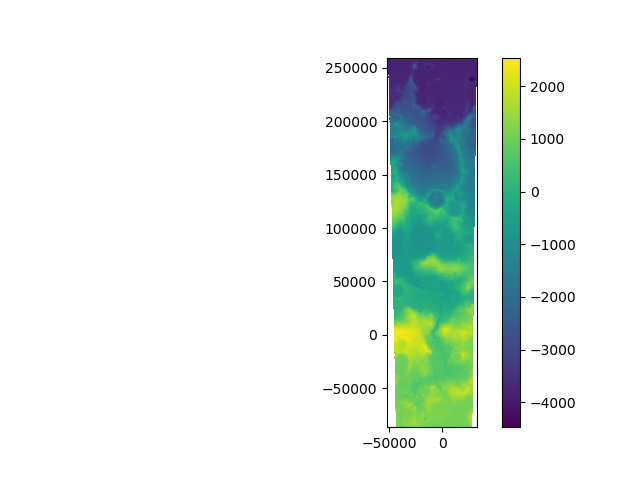

In [20]:
file = list(hrsc_dtm_data.data[product].keys())[0]
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(hrsc_dtm_data.data[product][file],
                        extent = hrsc_dtm_data.meta_data[product][file]['Extent'],
                        cmap = 'viridis',
                        interpolation = 'None')
raster_map_colorbar = plt.colorbar(raster_map)
plt.show()

## Mars Reconnaissance Orbiter

### HIRISE - High-Resolution Imaging Science Experiment

Now we can follow the exact same process with data at higher resolution than HRSC data. First, we look at a picture from HiRISE. Note that HiRISE data have an amazing resolution, up to 0.25 cm per pixel, so the images are heavy.

In [21]:
target = 'mars'
mission = 'MRO'
instrument = 'HIRISE'
product_type = 'RDRV11'
western_lon = 55.18
eastern_lon = 55.31
min_lat = -26.9
max_lat = -26.66
product_id = '*029815_1530*COLOR*'

hirise_data_fetcher = ODEDF(target, mission, instrument, product_type,
                            western_lon, eastern_lon, min_lat, max_lat,
                            product_id = product_id)
hirise_data = hirise_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MRO&iid=HIRISE&pt=RDRV11&westernlon=55.18&easternlon=55.31&minlat=-26.9&maxlat=-26.66&query=product&results=fp&output=XML&limit=10&offset=0&productid=*029815_1530*COLOR*

Files that will be downloaded (if not previously downloaded):

Product ID: ESP_029815_1530_COLOR
File name: ESP_029815_1530_COLOR.JP2
Description: PRODUCT DATA FILE
File name: ESP_029815_1530_COLOR.LBL
Description: PRODUCT LABEL FILE

Do you want to proceed? [Y/n] y


100%|██████████| 2/2 [00:11<00:00,  7.71s/it]


In this case, the no-data value in the label files is not correct, and we need to correct it manually.

In [22]:
for product in hirise_data.data:
    for file in hirise_data.data[product]:
        hirise_data.data[product][file][hirise_data.data[product][file] == 0] = np.nan

In [23]:
print(hirise_data.data.keys())

odict_keys(['ESP_029815_1530_COLOR'])


In [24]:
product = list(hirise_data.data.keys())[0]
print(hirise_data.data[product].keys())

odict_keys(['ESP_029815_1530_COLOR.LBL'])


In [25]:
file = list(hirise_data.data[product].keys())[0]
r_array = unit_scale_array(hirise_data.data[product][file][0])
g_array = unit_scale_array(hirise_data.data[product][file][1])
b_array = unit_scale_array(hirise_data.data[product][file][2])
alpha_array = np.ones(hirise_data.data[product][file][0].shape)
alpha_array[np.isnan(hirise_data.data[product][file][0])] = 0
composite_array = np.dstack((r_array, g_array, b_array, alpha_array))

<IPython.core.display.Javascript object>


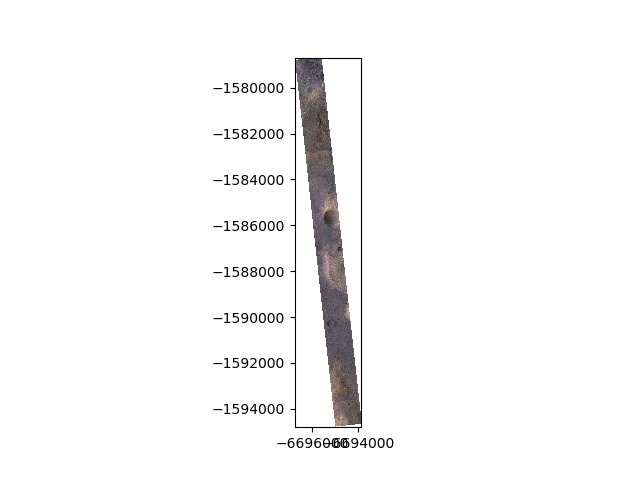

In [26]:
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(composite_array,
                        extent = hirise_data.meta_data[product][file]['Extent'],
                        interpolation = 'None')
plt.show()

Second, we can get a DTM. HiRISE DTM resolution is about 2 m per pixel, which makes them more manageable. But they cover a tiny fraction of Mars.

In [27]:
target = 'mars'
mission = 'MRO'
instrument = 'HIRISE'
product_type = 'DTM'
western_lon = 55.18
eastern_lon = 55.31
min_lat = -26.9
max_lat = -26.66
file_name = 'DT*'

hirise_dtm_data_fetcher = ODEDF(target, mission, instrument, product_type,
                                western_lon, eastern_lon, min_lat, max_lat,
                                file_name = file_name)
hirise_dtm_data = hirise_dtm_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MRO&iid=HIRISE&pt=DTM&westernlon=55.18&easternlon=55.31&minlat=-26.9&maxlat=-26.66&query=product&results=fp&output=XML&limit=10&offset=0

Files that will be downloaded (if not previously downloaded):

Product ID: DTEED_029815_1530_030092_1530_A01
File name: DTEED_029815_1530_030092_1530_A01.IMG
Description: PRODUCT DATA FILE WITH LABEL

Do you want to proceed? [Y/n] y


100%|██████████| 1/1 [00:07<00:00,  7.74s/it]


In [28]:
print(hirise_dtm_data.data.keys())

odict_keys(['DTEED_029815_1530_030092_1530_A01'])


In [29]:
product = list(hirise_dtm_data.data.keys())[0]
print(hirise_dtm_data.data[product].keys())

odict_keys(['DTEED_029815_1530_030092_1530_A01.IMG'])


<IPython.core.display.Javascript object>


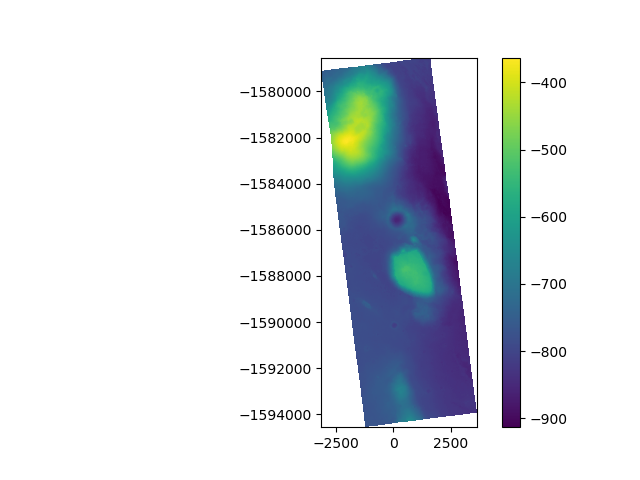

In [30]:
file = list((hirise_dtm_data.data[product].keys()))[0]
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(hirise_dtm_data.data[product][file],
                        extent = hirise_dtm_data.meta_data[product][file]['Extent'],
                        cmap = 'viridis',
                        interpolation = 'None')
raster_map_colorbar = plt.colorbar(raster_map)
plt.show()

### CRISM - Compact Reconnaissance Imaging Spectrometer for Mars

Contrary to the previous data sets, CRISM provides spectral data of Mars. We can get the raw, unprocessed and unprojected, data.

In [31]:
target = 'mars'
mission = 'MRO'
instrument = 'CRISM'
product_type = 'TRDR'
western_lon = 55.17
eastern_lon = 55.5
min_lat = -27
max_lat = -26
product_id = 'FRT0001A029_01_IF*'

crism_data_fetcher = ODEDF(target, mission, instrument, product_type,
                           western_lon, eastern_lon, min_lat, max_lat,
                           product_id = product_id)
crism_data = crism_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MRO&iid=CRISM&pt=TRDR&westernlon=55.17&easternlon=55.5&minlat=-27&maxlat=-26&query=product&results=fp&output=XML&limit=10&offset=0&productid=FRT0001A029_01_IF*

Files that will be downloaded (if not previously downloaded):

Product ID: FRT0001A029_01_IF119S_TRR3
File name: frt0001a029_01_if119s_trr3.img
Description: PRODUCT DATA FILE
File name: frt0001a029_01_if119s_trr3.lbl
Description: PRODUCT LABEL FILE
File name: frt0001a029_01_ra119s_hkp3.tab
Description: PRODUCT DATA FILE

Do you want to proceed? [Y/n] y


100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

File frt0001a029_01_if119s_trr3.lbl has been corrected
File frt0001a029_01_ra119s_hkp3.tab could not be opened


In this case, the no-data value in the label files is not correct, and we need to correct it manually.

In [32]:
for product in crism_data.data:
    for file in crism_data.data[product]:
        crism_data.data[product][file][crism_data.data[product][file] == 65535.] = np.nan

In [33]:
print(crism_data.data.keys())

odict_keys(['FRT0001A029_01_IF119S_TRR3'])


In [34]:
product = list(crism_data.data.keys())[0]
print(crism_data.data[product].keys())

odict_keys(['frt0001a029_01_if119s_trr3.lbl'])


Here, several brands corresponding to different wavelengths are available, and we can change the band visible in the plot. The next example illustrates how to check which index corresponds to which wavelength.

In [35]:
file = list(crism_data.data[product].keys())[0]
print('Number of bands:', crism_data.data[product][file].shape[0])

Number of bands: 107


<IPython.core.display.Javascript object>


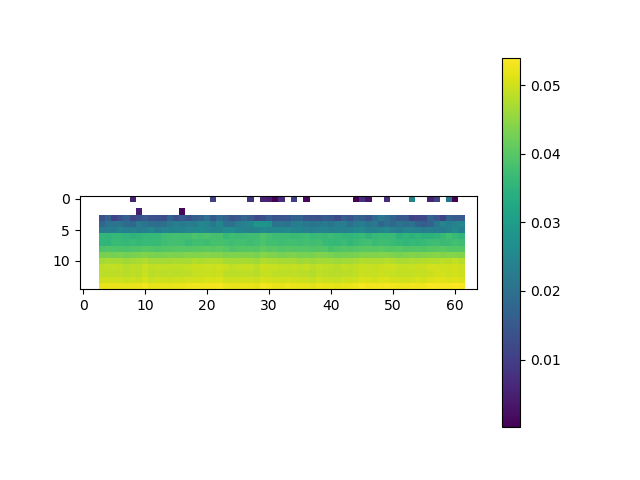

In [36]:
band = 0
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(crism_data.data[product][file][band],
                        cmap = 'viridis',
                        interpolation = 'None')
raster_map_colorbar = plt.colorbar(raster_map)
plt.show()

More interestingly, projected data are also available.

In [37]:
target = 'mars'
mission = 'MRO'
instrument = 'CRISM'
product_type = 'MTRDR'
western_lon = 50
eastern_lon = 60
min_lat = -30
max_lat = -20

crism_proj_data_fetcher = ODEDF(target, mission, instrument, product_type,
                                western_lon, eastern_lon, min_lat, max_lat)
crism_proj_data = crism_proj_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MRO&iid=CRISM&pt=MTRDR&westernlon=50&easternlon=60&minlat=-30&maxlat=-20&query=product&results=fp&output=XML&limit=10&offset=0

Files that will be downloaded (if not previously downloaded):

Product ID: FRT00008D9E_07_IF164J_MTR3
File name: frt00008d9e_07_de164l_mtr1.hdr
Description: DDR ENVI HEADER
File name: frt00008d9e_07_de164l_mtr1.img
Description: DDR FILE
File name: frt00008d9e_07_de164l_mtr1.lbl
Description: DDR LABEL
File name: frt00008d9e_07_if164j_mtr3.hdr
Description: PRODUCT DATA FILE
File name: frt00008d9e_07_if164j_mtr3.img
Description: PRODUCT DATA FILE
File name: frt00008d9e_07_if164j_mtr3.lbl
Description: PRODUCT LABEL FILE
File name: frt00008d9e_07_in164j_mtr3.hdr
Description: DP INFORMATION MAPS ENVI HEADER
File name: frt00008d9e_07_in164j_mtr3.img
Description: DP INFORMATION MAPS FILE
File name: frt00008d9e_07_in164j_mtr3.lbl
Description: DP INFORMATION MAPS LABEL
File name: frt00008d9e_07_sr164j_mtr3.

100%|██████████| 34/34 [09:47<00:00,  6.58s/it]


File frt00008d9e_07_wv164j_mtr3.lbl could not be opened
File frt00008d9e_07_wv164j_mtr3.tab could not be opened
File hrl00008536_07_wv181j_mtr3.lbl could not be opened
File hrl00008536_07_wv181j_mtr3.tab could not be opened


In this case, the no-data value in the label files is not correct, and we need to correct it manually.

In [38]:
for product in crism_proj_data.data:
    for file in crism_proj_data.data[product]:
        crism_proj_data.data[product][file][crism_proj_data.data[product][file] == 65535.] = np.nan

In [39]:
print(crism_proj_data.data.keys())

odict_keys(['FRT00008D9E_07_IF164J_MTR3', 'HRL00008536_07_IF181J_MTR3'])


In [40]:
product = list(crism_proj_data.data.keys())[0]
print(crism_proj_data.data[product].keys())

odict_keys(['frt00008d9e_07_de164l_mtr1.lbl', 'frt00008d9e_07_if164j_mtr3.lbl', 'frt00008d9e_07_in164j_mtr3.lbl', 'frt00008d9e_07_sr164j_mtr3.lbl', 'frt00008d9e_07_su164j_mtr3.lbl'])


In [41]:
file = list(crism_proj_data.data[product].keys())[1]
print('Number of bands:', crism_proj_data.data[product][file].shape[0])

Number of bands: 489


<IPython.core.display.Javascript object>


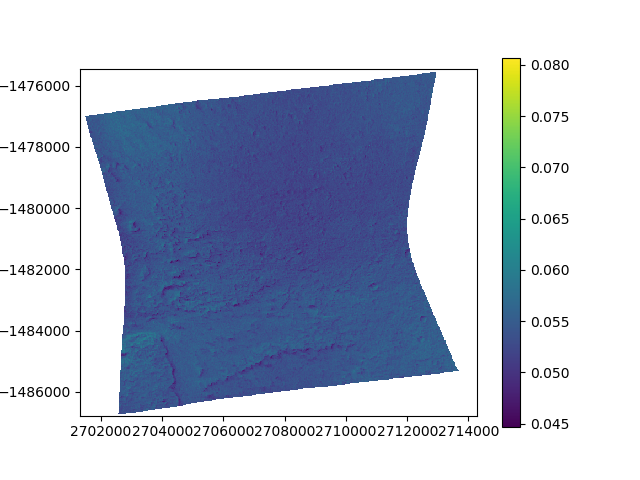

In [42]:
band = 0
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(crism_proj_data.data[product][file][band],
                        extent = crism_proj_data.meta_data[product][file]['Extent'],
                        cmap = 'viridis',
                        interpolation = 'None')
raster_map_colorbar = plt.colorbar(raster_map)
plt.show()

Now we want to build an RGB composite using three precise wavelengths. We look at the files unopened by GDAL: 

In [43]:
crism_proj_data.meta_data[product]['Unopened files']

[['/Users/grongier/.skdaccess/ode/http/pds-geosciences.wustl.edu/mro/mro-m-crism-5-rdr-mptargeted-v1/mrocr_4001/mtrdr/2007/2007_354/frt00008d9e/frt00008d9e_07_wv164j_mtr3.lbl',
  '/Users/grongier/.skdaccess/ode/http/pds-geosciences.wustl.edu/mro/mro-m-crism-5-rdr-mptargeted-v1/mrocr_4001/mtrdr/2007/2007_354/frt00008d9e/frt00008d9e_07_wv164j_mtr3.tab']]

The files .tab contains the relationship between indexes of the array and wavelength. We can use [pandas](https://pandas.pydata.org/) to have a look at the table and find the indexes corresponding to the desired wavelengths.

In [44]:
wavelength_table = pd.read_table(crism_proj_data.meta_data[product]['Unopened files'][0][1],
                                 header = None, sep = ',')

In [45]:
wavelength_table[((wavelength_table[2] > 750) & (wavelength_table[2] < 800)
                  | ((wavelength_table[2] > 1300) & (wavelength_table[2] < 1350))
                  | ((wavelength_table[2] > 2500) & (wavelength_table[2] < 2550)))]

,0,1,2,3,4
38,1,245,755.35,8.91,1
39,1,246,761.87,8.93,1
40,1,247,768.40,8.94,1
41,1,248,774.92,8.96,1
42,1,249,781.45,8.98,1
43,1,250,787.98,8.99,1
44,1,251,794.51,9.01,1
117,0,399,1302.95,10.85,1
118,0,398,1309.52,10.87,1
119,0,397,1316.08,10.90,1


Now, we can build the composite image and visualize it.

In [46]:
r_array = unit_scale_array(crism_proj_data.data[product][file][304])
g_array = unit_scale_array(crism_proj_data.data[product][file][121])
b_array = unit_scale_array(crism_proj_data.data[product][file][39])
alpha_array = np.ones(r_array.shape)
alpha_array[np.isnan(r_array)] = 0
composite_array = np.dstack((r_array, g_array, b_array, alpha_array))

print('Wavelenghts:',
      'Red', wavelength_table[2][304], 'nm |',
      'Blue', wavelength_table[2][121], 'nm |',
      'Green', wavelength_table[2][29], 'nm')

Wavelenghts: Red 2536.11 nm | Blue 1329.21 nm | Green 624.92 nm


<IPython.core.display.Javascript object>


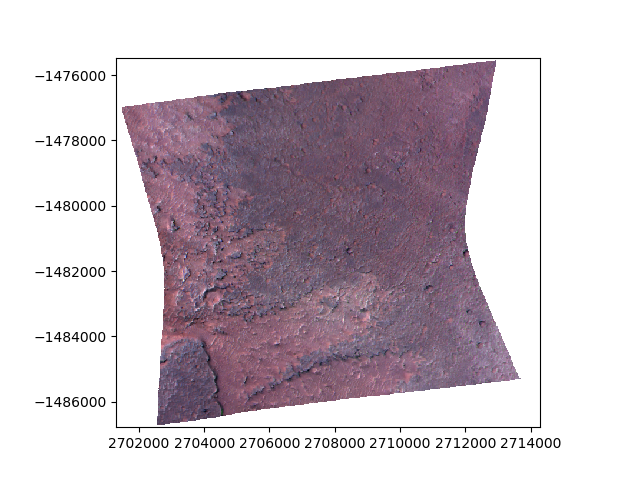

In [47]:
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(composite_array,
                        extent = crism_proj_data.meta_data[product][file]['Extent'],
                        interpolation = 'None')
plt.show()

In this example, we have downloaded two products. We have already processed the first one, now we can do the same thing with the second one. Note that the .tab file is the same as in the previous product, and we look for the same wavelengths.

In [48]:
product = list(crism_proj_data.data.keys())[1]
print(crism_proj_data.data[product].keys())

odict_keys(['hrl00008536_07_de181l_mtr1.lbl', 'hrl00008536_07_if181j_mtr3.lbl', 'hrl00008536_07_in181j_mtr3.lbl', 'hrl00008536_07_sr181j_mtr3.lbl', 'hrl00008536_07_su181j_mtr3.lbl'])


In [49]:
file = list(crism_proj_data.data[product].keys())[1]
print('Number of bands:', crism_proj_data.data[product][file].shape[0])

Number of bands: 489


<IPython.core.display.Javascript object>


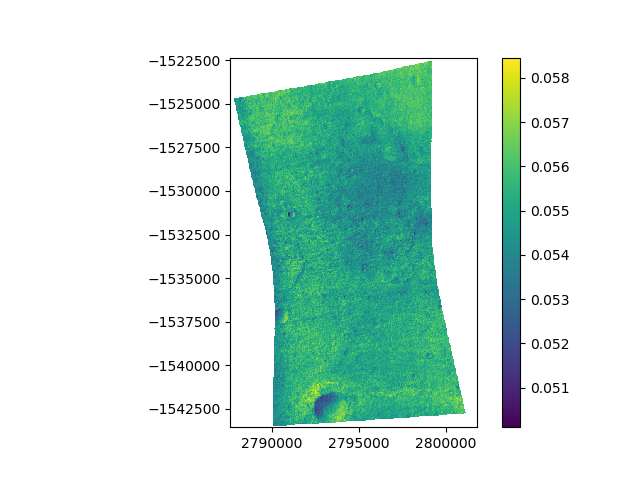

In [50]:
band = 0
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(crism_proj_data.data[product][file][band],
                        extent = crism_proj_data.meta_data[product][file]['Extent'],
                        cmap = 'viridis',
                        interpolation = 'None')
raster_map_colorbar = plt.colorbar(raster_map)
plt.show()

In [51]:
r_array = unit_scale_array(crism_proj_data.data[product][file][304])
g_array = unit_scale_array(crism_proj_data.data[product][file][121])
b_array = unit_scale_array(crism_proj_data.data[product][file][39])
alpha_array = np.ones(r_array.shape)
alpha_array[np.isnan(r_array)] = 0
composite_array = np.dstack((r_array, g_array, b_array, alpha_array))

print('Wavelenghts:',
      'Red', wavelength_table[2][304], 'nm |',
      'Blue', wavelength_table[2][121], 'nm |',
      'Green', wavelength_table[2][29], 'nm |')

Wavelenghts: Red 2536.11 nm | Blue 1329.21 nm | Green 624.92 nm |


<IPython.core.display.Javascript object>


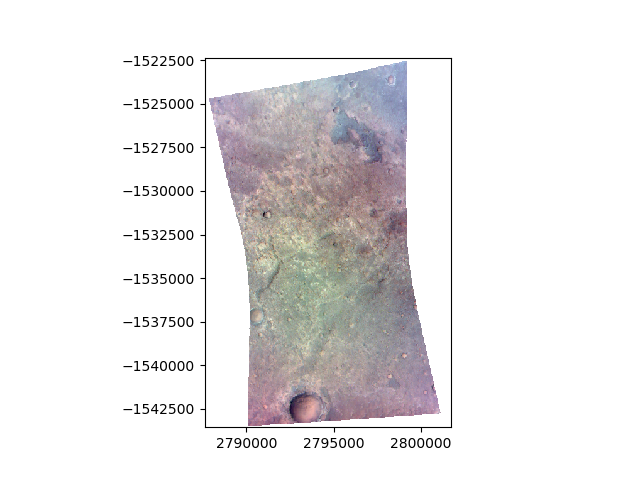

In [52]:
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(composite_array,
                        extent = crism_proj_data.meta_data[product][file]['Extent'],
                        interpolation = 'None')
plt.show()

### CTX - Context Camera

CTX images provides some regional context about HiRISE and CRISM data. Unfortunately, only the raw, unprocessed and unprojected, data are available.

In [53]:
target = 'mars'
mission = 'MRO'
instrument = 'CTX'
product_type = 'EDR'
western_lon = 55.18
eastern_lon = 55.31
min_lat = -26.9
max_lat = -26.66
product_id = 'D04*27S305W*'

ctx_data_fetcher = ODEDF(target, mission, instrument, product_type,
                         western_lon, eastern_lon, min_lat, max_lat,
                         product_id = product_id)
ctx_data = ctx_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mars&ihid=MRO&iid=CTX&pt=EDR&westernlon=55.18&easternlon=55.31&minlat=-26.9&maxlat=-26.66&query=product&results=fp&output=XML&limit=10&offset=0&productid=D04*27S305W*

Files that will be downloaded (if not previously downloaded):

Product ID: D04_028958_1529_XN_27S305W
File name: D04_028958_1529_XN_27S305W.IMG
Description: PRODUCT DATA FILE WITH LABEL

Do you want to proceed? [Y/n] y


100%|██████████| 1/1 [00:25<00:00, 25.97s/it]


In [54]:
print(ctx_data.data.keys())

odict_keys(['D04_028958_1529_XN_27S305W'])


In [55]:
product = list(ctx_data.data.keys())[0]
print(ctx_data.data[product].keys())

odict_keys(['D04_028958_1529_XN_27S305W.IMG'])


<IPython.core.display.Javascript object>


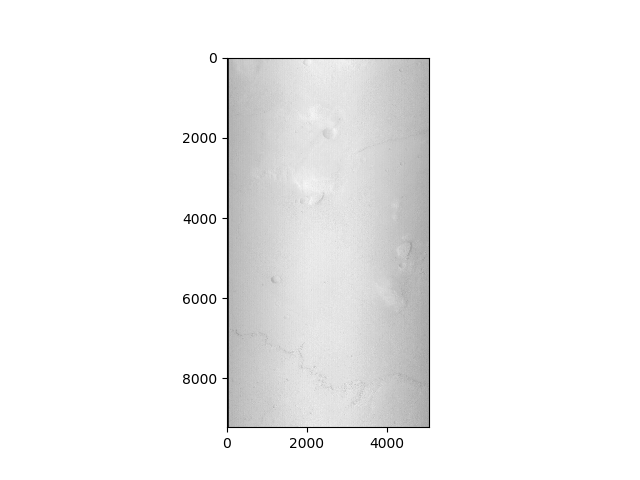

In [56]:
file = list(ctx_data.data[product].keys())[0]
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(ctx_data.data[product][file],
                        extent = ctx_data.meta_data[product][file]['Extent'],
                        cmap = 'gray',
                        interpolation = 'None')
plt.show()

# Examples of data available for other planetary bodies

ODE provides access to data sets from other planetary bodies than just Mars. However, the process to access those data from SCIKIT-data access remains the same.

## Moon: Lunar Orbiter Laser Altimeter (LOLA)

Moon data are accessible through the [Lunar Orbital Data Explorer](http://ode.rsl.wustl.edu/moon/indexProductSearch.aspx).

In [57]:
target = 'moon'
mission = 'LRO'
instrument = 'LOLA'
product_type = 'SLDEM'
product_id = 'SLDEM2015_256_0N_60N_120_240_FLOAT'

lola_data_fetcher = ODEDF(target, mission, instrument, product_type,
                          product_id = product_id)
lola_data = lola_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=moon&ihid=LRO&iid=LOLA&pt=SLDEM&query=product&results=fp&output=XML&limit=10&offset=0&productid=SLDEM2015_256_0N_60N_120_240_FLOAT

Files that will be downloaded (if not previously downloaded):

Product ID: SLDEM2015_256_0N_60N_120_240_FLOAT
File name: sldem2015_256_0n_60n_120_240_float.img
Description: PRODUCT DATA FILE
File name: sldem2015_256_0n_60n_120_240_float.lbl
Description: PRODUCT LABEL FILE

Do you want to proceed? [Y/n] y


100%|██████████| 2/2 [11:02<00:00, 463.53s/it]


In [58]:
print(lola_data.data.keys())

odict_keys(['SLDEM2015_256_0N_60N_120_240_FLOAT'])


In [59]:
product = list(lola_data.data.keys())[0]
print(lola_data.data[product].keys())

odict_keys(['sldem2015_256_0n_60n_120_240_float.lbl'])


<IPython.core.display.Javascript object>


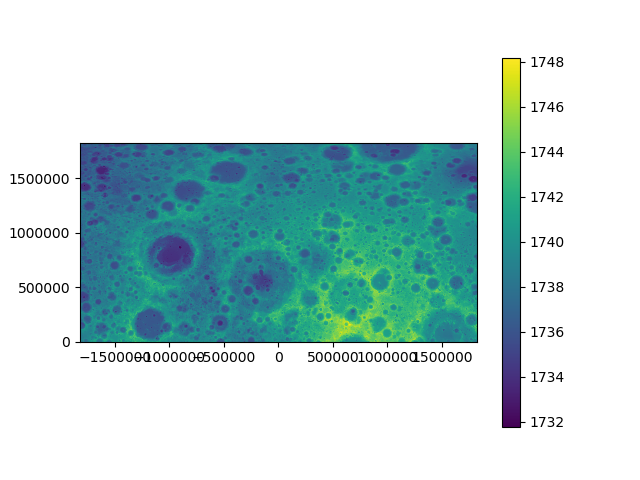

In [60]:
file = list(lola_data.data[product].keys())[0]
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(lola_data.data[product][file],
                        extent = lola_data.meta_data[product][file]['Extent'],
                        cmap = 'viridis',
                        interpolation = 'None')
raster_map_colorbar = plt.colorbar(raster_map)
plt.show()

## Venus: Magellan

Venus data are accessible through the [Venus Orbital Data Explorer](http://ode.rsl.wustl.edu/venus/indexProductSearch.aspx).

In [61]:
target = 'venus'
mission = 'MGN'
instrument = 'RDRS'
product_type = 'TOPO'
product_id = 'TOPOGRD-IMG'

magellan_data_fetcher = ODEDF(target, mission, instrument, product_type,
                              product_id = product_id)
magellan_data = magellan_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=venus&ihid=MGN&iid=RDRS&pt=TOPO&query=product&results=fp&output=XML&limit=10&offset=0&productid=TOPOGRD-IMG

Files that will be downloaded (if not previously downloaded):

Product ID: TOPOGRD-IMG
File name: topogrd.img
Description: PRODUCT DATA FILE
File name: topogrd.lbl
Description: PRODUCT LABEL FILE

Do you want to proceed? [Y/n] y


100%|██████████| 2/2 [00:00<00:00,  3.87it/s]


In [62]:
print(magellan_data.data.keys())

odict_keys(['TOPOGRD-IMG'])


In [63]:
product = list(magellan_data.data.keys())[0]
print(magellan_data.data[product].keys())

odict_keys(['topogrd.lbl'])


In this case, GDAL could not read correctly the geotransform from the label, and we cannot use the extent in the plot.

In [64]:
file = list(magellan_data.data[product].keys())[0]
print('Geotransform', magellan_data.meta_data[product][file]['Geotransform'])
print('Extent:', magellan_data.meta_data[product][file]['Extent'])

Geotransform (-0.0, 0.0, 0.0, 0.0, 0.0, -0.0)
Extent: (-0.0, 0.0, 0.0, 0.0)


<IPython.core.display.Javascript object>


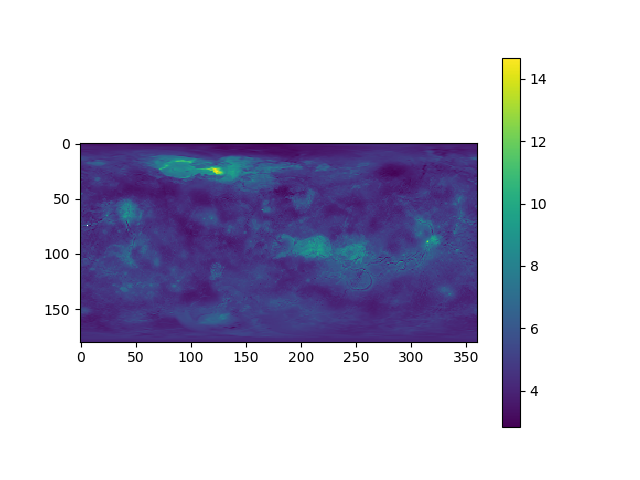

In [65]:
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(magellan_data.data[product][file],
                        cmap = 'viridis',
                        interpolation = 'None')
raster_map_colorbar = plt.colorbar(raster_map)
plt.show()

## Mercury: Messenger

Mercury data are accessible through the [Mercury Orbital Data Explorer](http://ode.rsl.wustl.edu/mercury/indexProductSearch.aspx).

In [66]:
target = 'mercury'
mission = 'MESSENGER'
instrument = 'MDIS-WAC/NAC'
product_type = 'DEM'
product_id = 'MSGR_DEM_DLR_EQ_H03_DM_222_I_V01'
file_name = 'MSGR*'

messenger_data_fetcher = ODEDF(target, mission, instrument, product_type,
                               product_id = product_id, file_name = file_name)
messenger_data = messenger_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=mercury&ihid=MESSENGER&iid=MDIS-WAC/NAC&pt=DEM&query=product&results=fp&output=XML&limit=10&offset=0&productid=MSGR_DEM_DLR_EQ_H03_DM_222_I_V01

Files that will be downloaded (if not previously downloaded):

Product ID: MSGR_DEM_DLR_EQ_H03_DM_222_I_V01
File name: MSGR_DEM_DLR_EQ_H03_DM_222_I_V01.IMG
Description: PRODUCT DATA FILE
File name: MSGR_DEM_DLR_EQ_H03_DM_222_I_V01.LBL
Description: PRODUCT LABEL FILE

Do you want to proceed? [Y/n] y


100%|██████████| 2/2 [00:21<00:00, 15.11s/it]


In [67]:
print(messenger_data.data.keys())

odict_keys(['MSGR_DEM_DLR_EQ_H03_DM_222_I_V01'])


In [68]:
product = list(messenger_data.data.keys())[0]
print(messenger_data.data[product].keys())

odict_keys(['MSGR_DEM_DLR_EQ_H03_DM_222_I_V01.LBL'])


<IPython.core.display.Javascript object>


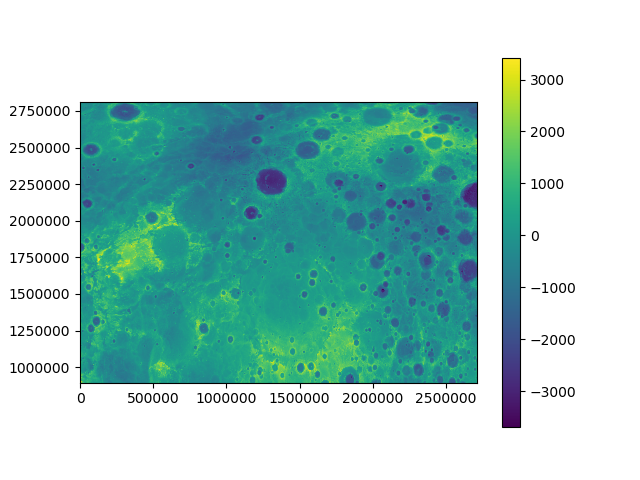

In [69]:
file = list(messenger_data.data[product].keys())[0]
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map = plt.imshow(messenger_data.data[product][file],
                        extent = messenger_data.meta_data[product][file]['Extent'],
                        cmap = 'viridis',
                        interpolation = 'None')
raster_map_colorbar = plt.colorbar(raster_map)
plt.show()

## Phobos: Mars Express

Phobos data are accessible through the [Mars Orbital Data Explorer](http://ode.rsl.wustl.edu/mars/indexProductSearch.aspx).

In [70]:
target = 'phobos'
mission = 'MEX'
instrument = 'HRSC'
product_type = 'phobos'
product_id = '*ORT_36N_083W*'

phobos_data_fetcher = ODEDF(target, mission, instrument, product_type,
                            product_id = product_id)
phobos_data = phobos_data_fetcher.output()

Query URL: http://oderest.rsl.wustl.edu/live2/?target=phobos&ihid=MEX&iid=HRSC&pt=phobos&query=product&results=fp&output=XML&limit=10&offset=0&productid=*ORT_36N_083W*

Files that will be downloaded (if not previously downloaded):

Product ID: H2780_0000_P24_ORT_36N_083W.JP2
File name: h2780_0000_p24_ort_36n_083w.img
Description: PRODUCT DATA IMG FILE
File name: h2780_0000_p24_ort_36n_083w.jp2
Description: PRODUCT DATA FILE
File name: h2780_0000_p24_ort_36n_083w.lbl
Description: PRODUCT LABEL FILE

Do you want to proceed? [Y/n] y


100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


In [71]:
print(phobos_data.data.keys())

odict_keys(['H2780_0000_P24_ORT_36N_083W.JP2'])


In [72]:
product = list(phobos_data.data.keys())[0]
print(phobos_data.data[product].keys())

odict_keys(['h2780_0000_p24_ort_36n_083w.img', 'h2780_0000_p24_ort_36n_083w.lbl'])


<IPython.core.display.Javascript object>


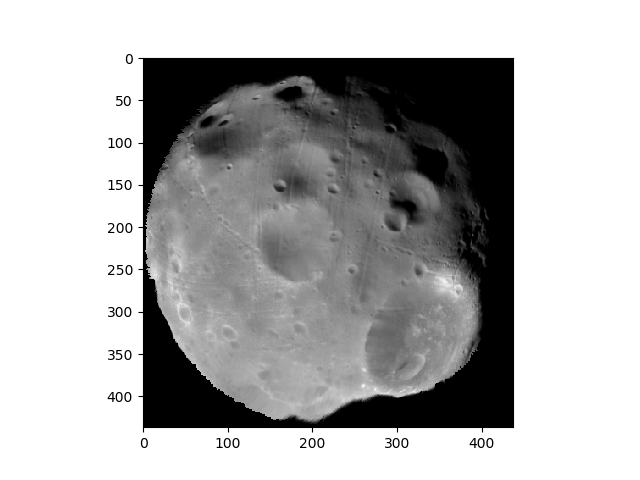

In [73]:
file_1 = list(phobos_data.data[product].keys())[1]
file_2 = list(phobos_data.data[product].keys())[0]
figure1 = plt.figure()
subfigure1 = figure1.add_subplot(111)
raster_map_1 = plt.imshow(phobos_data.data[product][file_1],
                          cmap = 'gray',
                          interpolation = 'None')
raster_map_1 = plt.imshow(phobos_data.data[product][file_2],
                          cmap = 'gray',
                          interpolation = 'None')
plt.show()